In [18]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style(rc={'figure.figsize':(3.25,1), 'font.family':"Times New Roman",
                                  'font.size': 8, 'dpi': 300})

plots = "/home/djanke3/Documents/Spyder/plots/"

In [19]:
with open("Dropout_w_Noise.json", 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame()

data_stats = {}
for i,d in data.items():
    ys = d["accs"]
    #ys["f1train"] = d["f1s"]["train"]
    #ys["f1val"] = d["f1s"]["val"]
    temp_df =  pd.DataFrame.from_dict(ys, orient = "columns")
    temp_df["do"] = d["dropout"]
    #print(d["nodes"])
    temp_df["shape"] = str(d["nodes"])
    df = pd.concat([df, temp_df], ignore_index = True)
    
    data_stats[i] = {}
    data_stats[i]["do"] = d["dropout"]
    data_stats[i]["median_train"] = np.median(d["accs"]["train"])
    data_stats[i]["median_val"] = np.median(d["accs"]["val"])
    data_stats[i]["iqr_train"] = np.quantile(d["accs"]["train"], 0.75) - np.quantile(d["accs"]["train"], 0.25)
    data_stats[i]["iqr_val"] = np.quantile(d["accs"]["val"], 0.75) - np.quantile(d["accs"]["val"], 0.25)
print(df.shape)
df.head()
    

(165000, 4)


,train,val,do,shape
0,0.758420,0.756250,0.0,"[12, 15, 9, 3, 1]"
1,0.750391,0.742448,0.0,"[12, 15, 9, 3, 1]"
2,0.690712,0.673177,0.0,"[12, 15, 9, 3, 1]"
3,0.826259,0.823698,0.0,"[12, 15, 9, 3, 1]"
4,0.776259,0.777995,0.0,"[12, 15, 9, 3, 1]"


In [20]:
df = pd.melt(df,id_vars = ["do","shape"], value_vars = ["train", "val"])
df.head()


,do,shape,variable,value
0,0.0,"[12, 15, 9, 3, 1]",train,0.758420
1,0.0,"[12, 15, 9, 3, 1]",train,0.750391
2,0.0,"[12, 15, 9, 3, 1]",train,0.690712
3,0.0,"[12, 15, 9, 3, 1]",train,0.826259
4,0.0,"[12, 15, 9, 3, 1]",train,0.776259


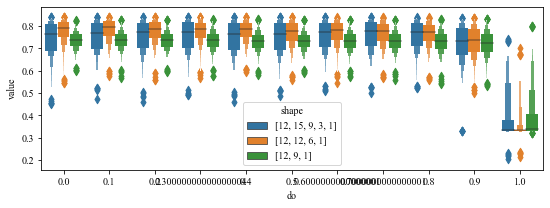

In [24]:
plt.figure(figsize = (9, 3))
sns.boxenplot(x = "do", y = "value", hue = "shape", data = df[df["variable"] == "train"])

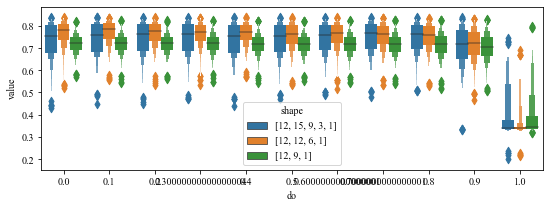

In [25]:
plt.figure(figsize = (9, 3))
sns.boxenplot(x = "do", y = "value", hue = "shape", data = df[df["variable"] == "val"])

In [5]:
sdf = pd.DataFrame.from_dict(data_stats, orient = "index")
sdf

,do,median_train,median_val,iqr_train,iqr_val
"trial0(12, 15, 9, 3, 1)00",0.0,0.759028,0.751628,0.126877,0.131185
"trial1(12, 15, 9, 3, 1)00",0.0,0.758507,0.751237,0.127680,0.128906
"trial2(12, 15, 9, 3, 1)00",0.0,0.758507,0.751628,0.127724,0.134245
"trial3(12, 15, 9, 3, 1)00",0.0,0.764714,0.755794,0.114410,0.118034
"trial4(12, 15, 9, 3, 1)00",0.0,0.776910,0.768880,0.112522,0.119661
...,...,...,...,...,...
"trial0(12, 9, 1)10",1.0,0.330729,0.336328,0.004818,0.007422
"trial1(12, 9, 1)10",1.0,0.384614,0.376693,0.163672,0.133529
"trial2(12, 9, 1)10",1.0,0.361155,0.361719,0.098177,0.077995
"trial3(12, 9, 1)10",1.0,0.332769,0.339323,0.010970,0.012760


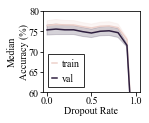

In [18]:
med_df = sdf[["do", "median_train", "median_val"]]
med_df.columns = ["do", "train", "val"]
med_df = pd.melt(med_df,id_vars = "do", value_vars = ["train", "val"])
med_df["value"] *= 100

fig = plt.figure()
fig.set_figheight(1.5)
fig.set_figwidth(1.75)
plt0 = sns.lineplot(x = "do", y ="value", data = med_df, hue = "variable", palette=sns.cubehelix_palette(2))
handles, labels = plt0.get_legend_handles_labels()
plt0.legend(handles[1:], labels[1:], edgecolor='black', fancybox=False, loc='lower left',
           handlelength = 0.5, handletextpad = 0.5, columnspacing = 0.5)

plt.ylabel("Median\nAccuracy (%)", labelpad = 0)
plt.xlabel("Dropout Rate", labelpad=0)
plt.ylim([60, 80])

plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_DO_medians.pdf"
fig.savefig(figname, dpi=300, bbox_inches='tight')
#plt.show()

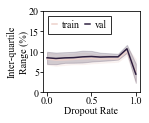

In [19]:
iqr_df = sdf[["do", "iqr_train", "iqr_val"]]
iqr_df.columns = ["do", "train", "val"]
iqr_df = pd.melt(iqr_df,id_vars = "do", value_vars = ["train", "val"])
iqr_df["value"] *= 100

fig = plt.figure()
fig.set_figheight(1.5)
fig.set_figwidth(1.75)
plt0 = sns.lineplot(x = "do", y ="value", data = iqr_df, hue = "variable", palette=sns.cubehelix_palette(2))
handles, labels = plt0.get_legend_handles_labels()
plt0.legend(handles[1:], labels[1:], loc = "upper left", ncol = 2, edgecolor='black', fancybox=False,
           handlelength = 0.5, handletextpad = 0.5, columnspacing = 0.5)

plt.ylabel("Inter-quartile\nRange (%)", labelpad = 0)
plt.xlabel("Dropout Rate", labelpad=0)
plt.ylim([0,20])

plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_DO_iqr.pdf"
fig.savefig(figname, dpi=300, bbox_inches='tight')
#plt.show()